In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA # proses pca
from scipy.stats import shapiro, probplot # uji normalitas 
from sklearn.preprocessing import StandardScaler # standarisasi data
from pandas.plotting import scatter_matrix #gakepake (exploring relationships between multiple variables in a dataset)
from sklearn.cluster import KMeans # clustering
from sklearn.preprocessing import LabelEncoder # encode
from sklearn import metrics #cek akurasi
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', None)

## Read Dataset

In [3]:
data = pd.read_csv('Wine.csv', sep=',')
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.040,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.050,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.030,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.860,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.040,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.050,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.020,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.060,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.080,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.010,3.55,1045,1


Berikut adalah penjelasan umum mengenai beberapa fitur yang umumnya terkait dengan analisis anggur:

- Alcohol: Persentase alkohol dalam anggur.
- Malic_Acid: Kandungan asam malat dalam anggur.
- Ash: Kandungan abu dalam anggur.
- Ash_Alcanity: Keasaman abu dalam anggur.
- Magnesium: Kandungan magnesium dalam anggur.
- Total_Phenols: Kandungan fenol total dalam anggur.
- Flavanoids: Kandungan flavonoid dalam anggur.
- Nonflavanoid_Phenols: Kandungan fenol non-flavonoid dalam anggur.
- Proanthocyanins: Kandungan proanthocyanin dalam anggur.
- Color_Intensity: Intensitas warna anggur.
- Hue: Hue atau warna dari anggur.
- OD280: Absorbansi optik pada 280 nm.
- Proline: Kandungan prolin dalam anggur.
- Customer_Segment: Variabel target atau label kategori yang mungkin menunjukkan kelas atau segmen dari anggur (tergantung pada jenis masalah analisis yang dilakukan).

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [6]:
duplicates = data[data.duplicated()]

if not duplicates.empty:
    print("Data duplikat ditemukan:")
    print(duplicates)
else:
    print("Tidak ada data duplikat")

Tidak ada data duplikat


In [7]:

data['Customer_Segment'].value_counts()

Customer_Segment
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
X = data.drop(columns = 'Customer_Segment')
y = data['Customer_Segment']

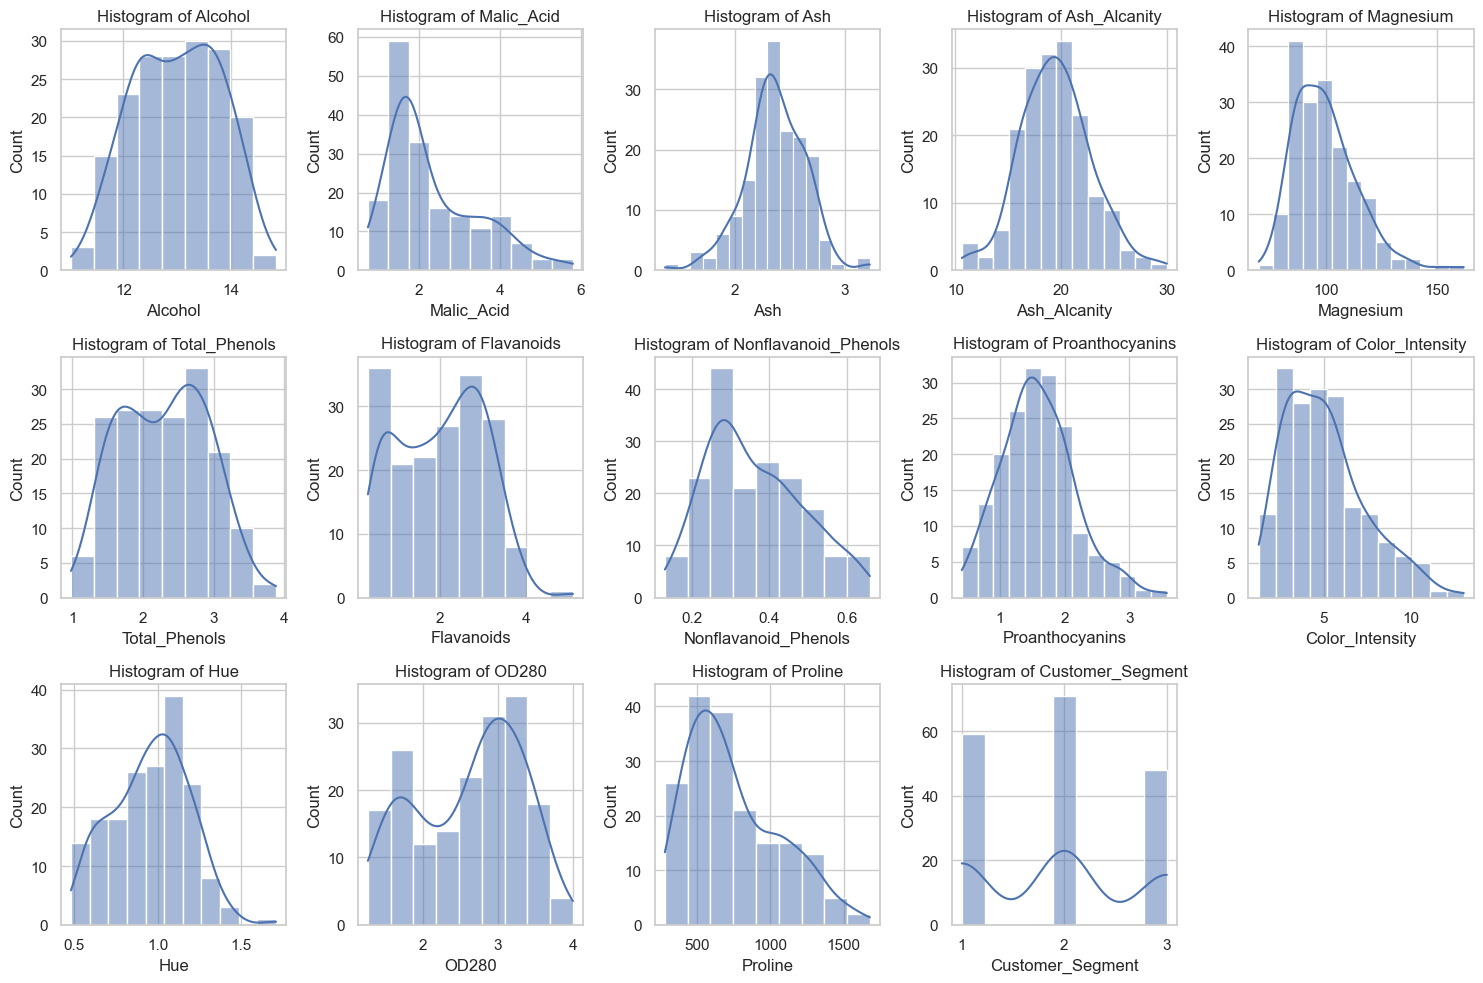

Shapiro-Wilk test for Alcohol: Statistic=0.981804609298706, p-value=0.020050711929798126
Shapiro-Wilk test for Malic_Acid: Statistic=0.8887840509414673, p-value=2.94582247484243e-10
Shapiro-Wilk test for Ash: Statistic=0.9839476346969604, p-value=0.038691021502017975
Shapiro-Wilk test for Ash_Alcanity: Statistic=0.9902263879776001, p-value=0.26394858956336975
Shapiro-Wilk test for Magnesium: Statistic=0.9383310079574585, p-value=6.345416068143095e-07
Shapiro-Wilk test for Total_Phenols: Statistic=0.9766812920570374, p-value=0.0043947165831923485
Shapiro-Wilk test for Flavanoids: Statistic=0.9545267224311829, p-value=1.6790636436780915e-05
Shapiro-Wilk test for Nonflavanoid_Phenols: Statistic=0.9625223875045776, p-value=0.00010552681487752125
Shapiro-Wilk test for Proanthocyanins: Statistic=0.980722963809967, p-value=0.01445252075791359
Shapiro-Wilk test for Color_Intensity: Statistic=0.9403189420700073, p-value=9.230111004399078e-07
Shapiro-Wilk test for Hue: Statistic=0.98134237527847

In [9]:
# Memeriksa distribusi menggunakan histogram
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
for column in data.columns:
    plt.subplot(3, 5, list(data.columns).index(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

# Menguji normalitas menggunakan uji Shapiro-Wilk
p_values = []  # Collect p-values in a list
for column in data.columns:
    stat, p_value = shapiro(data[column])
    p_values.append(p_value)
    print(f"Shapiro-Wilk test for {column}: Statistic={stat}, p-value={p_value}")

# Menggunakan alpha = 0.05 sebagai tingkat signifikansi
alpha = 0.05
if all(p_value > alpha for p_value in p_values):
    print("Semua fitur terdistribusi normal.")
else:
    print("Tidak semua fitur terdistribusi normal.")

for i in p_values:
    if i < alpha:
        print('data tidak normal')
    else:
        print('data normal')


### Normalisasi Data

In [10]:
def z_score_scaling(data):
    mean_vals = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    z_score_scaled_data = (data - mean_vals) / std_dev
    return z_score_scaled_data

zscore_alkohol = z_score_scaling(data['Alcohol'])
zscore_ash = z_score_scaling(data['Ash'])
zscore_malic_acid = z_score_scaling(data['Malic_Acid'])
zscore_magnesium = z_score_scaling(data['Magnesium'])
zscore_Total_Phenols = z_score_scaling(data['Total_Phenols'])
zscore_Flavanoids = z_score_scaling(data['Flavanoids'])
zscore_Nonflavanoid_Phenols = z_score_scaling(data['Nonflavanoid_Phenols'])
zscore_Proanthocyanins = z_score_scaling(data['Proanthocyanins'])
zscore_Color_Intensity = z_score_scaling(data['Color_Intensity'])
zscore_Hue = z_score_scaling(data['Hue'])
zscore_OD280 = z_score_scaling(data['OD280'])
zscore_Proline = z_score_scaling(data['Proline'])

In [11]:
data['Alcohol']=zscore_alkohol
data['Ash']=zscore_ash
data['Malic_Acid']=zscore_malic_acid
data['Magnesium']=zscore_magnesium
data['Total_Phenols']=zscore_Total_Phenols
data['Flavanoids']=zscore_Flavanoids
data['Nonflavanoid_Phenols']=zscore_Nonflavanoid_Phenols
data['Proanthocyanins']=zscore_Proanthocyanins
data['Color_Intensity']=zscore_Color_Intensity
data['Hue']=zscore_Hue
data['OD280']=zscore_OD280
data['Proline']=zscore_Proline

### Distribusi Tiap Kolom Yang Paling Mempengaruhi Kualitas Wine

<Axes: xlabel='Customer_Segment', ylabel='Hue'>

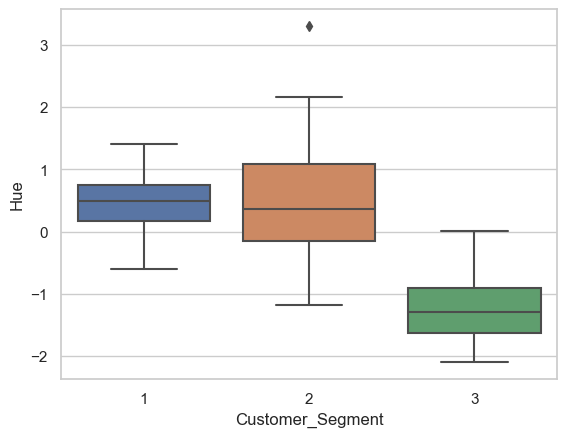

In [12]:
sns.boxplot(x='Customer_Segment',y='Hue', data=data)

<Axes: xlabel='Customer_Segment', ylabel='Proanthocyanins'>

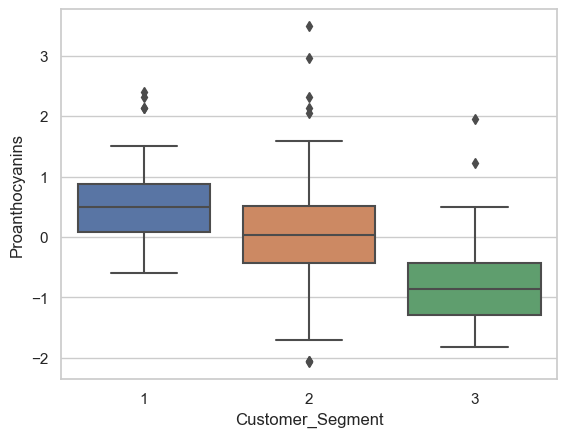

In [13]:
sns.boxplot(x='Customer_Segment',y='Proanthocyanins', data=data)

<Axes: xlabel='Customer_Segment', ylabel='Total_Phenols'>

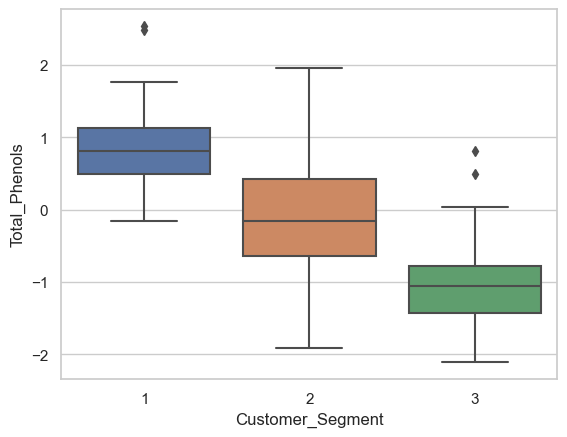

In [14]:
sns.boxplot(x='Customer_Segment',y='Total_Phenols', data=data)

<Axes: xlabel='Customer_Segment', ylabel='Flavanoids'>

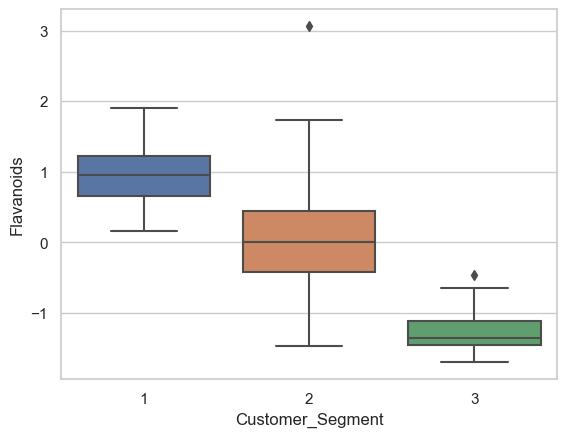

In [15]:
sns.boxplot(x='Customer_Segment',y='Flavanoids', data=data)

### Penyeragaman Skala Data dengan StandardScaller

In [16]:
cols = X.columns

In [17]:
std = StandardScaler()
x_std = std.fit_transform(X)
x_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [18]:
x_std = pd.DataFrame(x_std, columns=[cols])
x_std

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
5,1.481555,-0.517367,0.305159,-1.289707,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039
6,1.716255,-0.418624,0.305159,-1.469878,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520
7,1.308617,-0.167278,0.890014,-0.569023,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442
8,2.259772,-0.625086,-0.718336,-1.650049,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319
9,1.061565,-0.885409,-0.352802,-1.049479,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319


### Kmeans

In [19]:
kmeans = KMeans(n_clusters = 3,
               init = 'k-means++',
               n_init = 'warn',
                max_iter = 500,
                tol = 0.0001
               )

In [20]:
std_kmeans = kmeans.fit(x_std)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
labels = kmeans.labels_

# Mendapatkan pusat cluster (centroid)
centroids = std_kmeans.cluster_centers_

In [22]:
centroids

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [23]:
std_kmeans.inertia_

1277.928488844642

### Predict Data

In [24]:
le = LabelEncoder()
y_en = le.fit_transform(y)

In [25]:
hasil_std_kmeans = std_kmeans.predict(x_std)
hasil_std_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
# membandingkan hasil clustering dengan label sebenarnya
acc_std_kmeans = metrics.accuracy_score(y_en,hasil_std_kmeans)
acc_std_kmeans

0.016853932584269662

In [27]:
kmeans.cluster_centers_[:, 1]

array([ 0.87154706, -0.30380968, -0.39404154])

In [28]:
kmeans.cluster_centers_[:, 0]

array([ 0.16490746,  0.83523208, -0.92607185])

In [29]:
kmeans.cluster_centers_[:, 2]

array([ 0.18689833,  0.36470604, -0.49451676])

In [30]:
n_clusters = 3

### Inersia Tiap Model

In [31]:
cs_std = []
for i in range(1, 16):
    kmeans_std = KMeans(n_clusters = i, init = 'k-means++', n_init = 'warn', max_iter = 500, tol = 0.0001)
    kmeans_std.fit(x_std)
    cs_std.append(kmeans_std.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [32]:
cs_std

[2314.0000000000005,
 1658.7588524290952,
 1277.928488844642,
 1180.052623916245,
 1111.3087846793064,
 1049.5928373085133,
 995.409971399642,
 946.0979364015923,
 903.1387119547569,
 850.3156245878166,
 831.5273496965176,
 803.020397151068,
 762.0543956701486,
 742.219716652648,
 718.6747480586739]

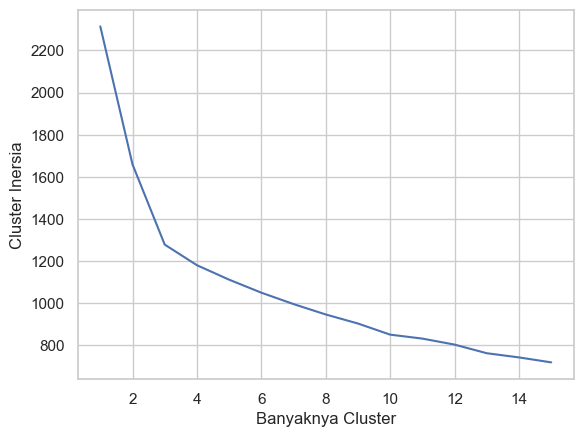

In [33]:
plt.plot(range(1,16),cs_std)
plt.xlabel('Banyaknya Cluster')
plt.ylabel('Cluster Inersia')
plt.show()

In [34]:
result_std = []
for i in range(1, len(cs_std)):
    diff = cs_std[i] - cs_std[i - 1]
    result_std.append(abs(diff))

In [35]:
result_std

[655.2411475709052,
 380.83036358445315,
 97.87586492839705,
 68.74383923693858,
 61.715947370793174,
 54.182865908871236,
 49.31203499804974,
 42.95922444683538,
 52.823087366940285,
 18.78827489129901,
 28.50695254544962,
 40.96600148091943,
 19.834679017500548,
 23.54496859397409]

In [36]:
homogenitas_std = metrics.homogeneity_score(y_en, hasil_std_kmeans)
homogenitas_std

0.8788432003662366

In [55]:
# Initialize the PCA model with the desired number of components
pca = PCA(n_components=4)
# Fit and transform the data
data_pca = pca.fit_transform(x_std)
data_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01,
         2.68417600e-02],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00,
      

In [56]:
# Anda dapat mengakses komponen utama dan eksplained variance ratio (rasio varians terjelaskan) jika perlu
components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_
components   

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086]])

In [57]:
explained_variance_ratio  #diatas 80% harusnya

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

In [58]:
# Membuat DataFrame dari data PCA
df_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2','Principal Component 3','Principal Component 4'])

# Menampilkan DataFrame hasil PCA
df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766
5,3.050254,-2.122401,-0.629396,-0.515637
6,2.449090,-1.174850,-0.977095,-0.065831
7,2.059437,-1.608963,0.146282,-1.192608
8,2.510874,-0.918071,-1.770969,0.056270
9,2.753628,-0.789438,-0.984247,0.349382


In [59]:
kmeans.fit(df_pca)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=500, n_clusters=3)

In [60]:
kmeans.inertia_

674.6349433774144

In [61]:
hasil = kmeans.predict(df_pca)
hasil

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [62]:
hasil_df = df_pca.copy()
hasil_df['predict'] = hasil+1

In [63]:
hasil_df.columns

Index(['Principal Component 1', 'Principal Component 2',
       'Principal Component 3', 'Principal Component 4', 'predict'],
      dtype='object')

In [64]:
hasil_df

,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,predict
0,3.316751,-1.443463,-0.165739,-0.215631,2
1,2.209465,0.333393,-2.026457,-0.291358,2
2,2.516740,-1.031151,0.982819,0.724902,2
3,3.757066,-2.756372,-0.176192,0.567983,2
4,1.008908,-0.869831,2.026688,-0.409766,2
5,3.050254,-2.122401,-0.629396,-0.515637,2
6,2.449090,-1.174850,-0.977095,-0.065831,2
7,2.059437,-1.608963,0.146282,-1.192608,2
8,2.510874,-0.918071,-1.770969,0.056270,2
9,2.753628,-0.789438,-0.984247,0.349382,2


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3112\1302927159.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(hasil_df['Principal Component 1'], hasil_df['Principal Component 2'], hasil_df['Principal Component 3'], c=colors[labels], s=50, cmap='viridis')


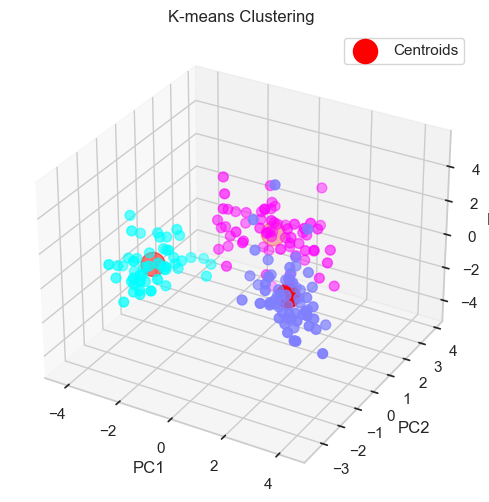

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Diperlukan untuk plotting 3D

# Warna klaster menggunakan palet warna "cool"
colors = plt.cm.cool(np.linspace(0, 1, n_clusters))  # ganti "cool" sesuai dengan palet yang diinginkan

# Visualisasi data hasil klaster
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # Menggunakan subplot 3D

scatter = ax.scatter(hasil_df['Principal Component 1'], hasil_df['Principal Component 2'], hasil_df['Principal Component 3'], c=colors[labels], s=50, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', label='Centroids')

# Menambahkan label sumbu
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Menambahkan judul
ax.set_title('K-means Clustering')

# Menambahkan legenda
ax.legend()

# Menampilkan plot
plt.show()


In [48]:
acc = metrics.accuracy_score(y_en,hasil)
acc

0.016853932584269662

In [49]:
data['predict']=hasil+1
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,predict
0,1.518613,-0.562250,0.232053,15.6,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1,3
1,0.246290,-0.499413,-0.827996,11.2,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,3
2,0.196879,0.021231,1.109334,18.6,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1,3
3,1.691550,-0.346811,0.487926,16.8,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,3
4,0.295700,0.227694,1.840403,21.0,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1,3
5,1.481555,-0.517367,0.305159,15.2,0.860705,1.562093,1.366128,-0.176095,0.664217,0.731870,0.406051,0.336606,2.239039,1,3
6,1.716255,-0.418624,0.305159,14.6,-0.262708,0.328298,0.492677,-0.498407,0.681738,0.083015,0.274431,1.367689,1.729520,1,3
7,1.308617,-0.167278,0.890014,17.6,1.492625,0.488531,0.482637,-0.417829,-0.597284,-0.003499,0.449924,1.367689,1.745442,1,3
8,2.259772,-0.625086,-0.718336,14.0,-0.192495,0.808997,0.954502,-0.578985,0.681738,0.061386,0.537671,0.336606,0.949319,1,3
9,1.061565,-0.885409,-0.352802,16.0,-0.122282,1.097417,1.125176,-1.143031,0.453967,0.935177,0.230557,1.325316,0.949319,1,3


<Axes: xlabel='predict', ylabel='Proanthocyanins'>

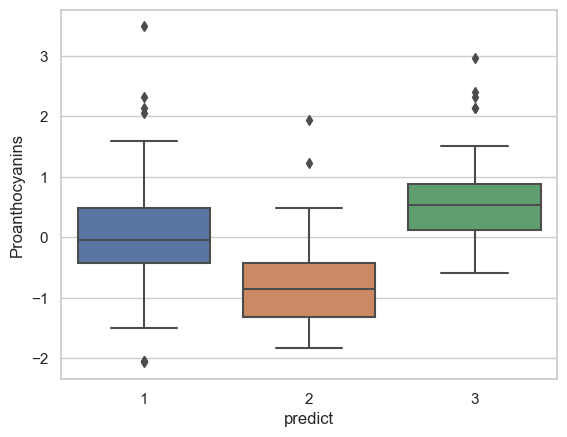

In [50]:
sns.boxplot(x='predict',y='Proanthocyanins', data=data)

<Axes: xlabel='predict', ylabel='Total_Phenols'>

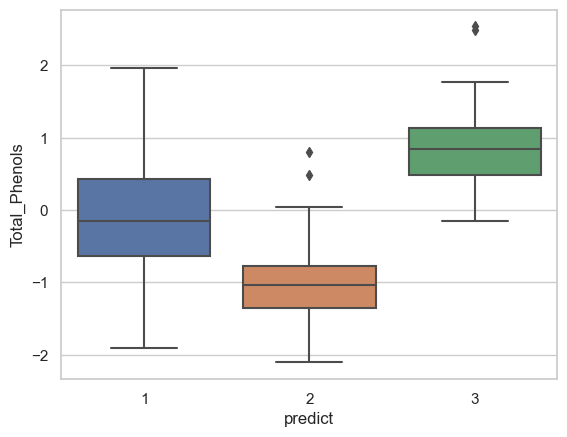

In [51]:
sns.boxplot(x='predict',y='Total_Phenols', data=data)

<Axes: xlabel='predict', ylabel='Flavanoids'>

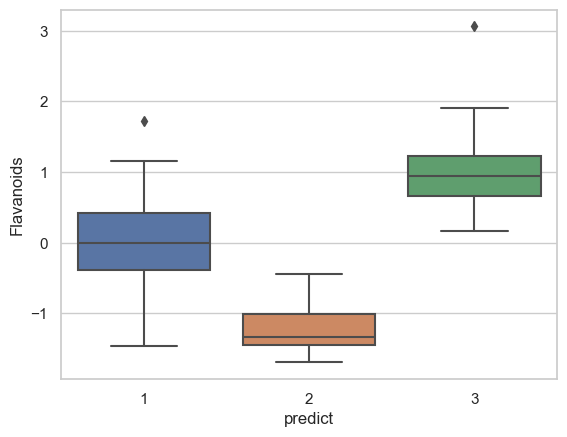

In [52]:
sns.boxplot(x='predict',y='Flavanoids', data=data)

Kesimpulan :

1) Pada hasil cluster Customer Segmentation didapatkan cluster 1 merupakan kategori wine termahal, cluster 2 kategori wine biasa saja, cluster 3 murah berdasarkan kolom Hue, Proanthocyanins, Total_Phenols, Flavanoids karena makin tinggi kadarnya semakin mahal harga wine nya.

2) Pada hasil cluster Prediksi didapatkan cluster 3 merupakan kategori wine termahal, cluster 1 kategori wine biasa saja, cluster 2 murah berdasarkan kolom Hue, Proanthocyanins, Total_Phenols, Flavanoids karena makin tinggi kadarnya semakin mahal harga wine nya.

3) Dari interpretasi diatas maka sangat mendukung bahwa akurasi yang didapatkan sangat kecil